# **Libraries**

In [3]:
!pip install torchvision --quiet

In [ ]:
# Importing standard libraries and modules for data manipulation, visualization, and warnings management
import numpy as np  # For numerical operations and array manipulations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib
import plotly.express as px  # For creating interactive plots and dashboards
import os  # For interacting with the operating system
import warnings  # For issuing warning messages
warnings.filterwarnings("ignore")  # Ignoring all warnings to avoid clutter in the output
import time


# Importing modules for image processing
from PIL import Image  # For opening, manipulating, and saving many different image file formats

# Importing colorama for color formatting in terminal output
import colorama
from colorama import Fore, Style  # For color and style formatting in terminal text

# Importing PyTorch and related modules for building and training neural networks
import torch  # PyTorch core library
import torch.nn as nn  # For building neural network layers and models
import torch.nn.functional as F  # For functional operations like activation functions
from torch.utils.data import DataLoader  # For loading and batching datasets
import torch.optim as optim  # For optimization algorithms
import torchvision  # For vision-related tasks and pre-trained models
from torchvision.datasets import ImageFolder  # For loading image datasets organized in folders
import torchvision.transforms as transforms  # For image transformations and data augmentation


# **Preprocessing**

In [2]:
train_path =  "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path =  "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/kaggle/input/new-plant-diseases-dataset/test"

Diseases_Classes = os.listdir(train_path)

In [3]:
Diseases_Classes

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

In [5]:
import os
import matplotlib.pyplot as plt

# Adjust these numbers as needed
rows = 5
cols = 5
num_classes_to_display = min(len(Diseases_Classes), rows * cols)

plt.figure(figsize=(40, 40), dpi=100)  # Adjust figure size and dpi for better performance
cnt = 0
plant_names = []
tot_images = 0

for i in Diseases_Classes[:num_classes_to_display]:
    cnt += 1
    plant_names.append(i)
    plt.subplot(rows, cols, cnt)
    
    image_path = os.listdir(os.path.join(train_path, i))
    print("The Number of Images in " + i + ":", len(image_path))
    tot_images += len(image_path)
    
    if image_path:  # Check if the list is not empty
        img_show = plt.imread(os.path.join(train_path, i, image_path[0]))
        plt.imshow(img_show)
    else:
        plt.text(0.5, 0.5, 'No Image', ha='center', va='center', fontsize=30)
    
    plt.xlabel(i, fontsize=30)
    plt.xticks([])
    plt.yticks([])

print("\nTotal Number of Images in Directory: ", tot_images)
plt.tight_layout()
plt.show()


NameError: name 'Diseases_Classes' is not defined

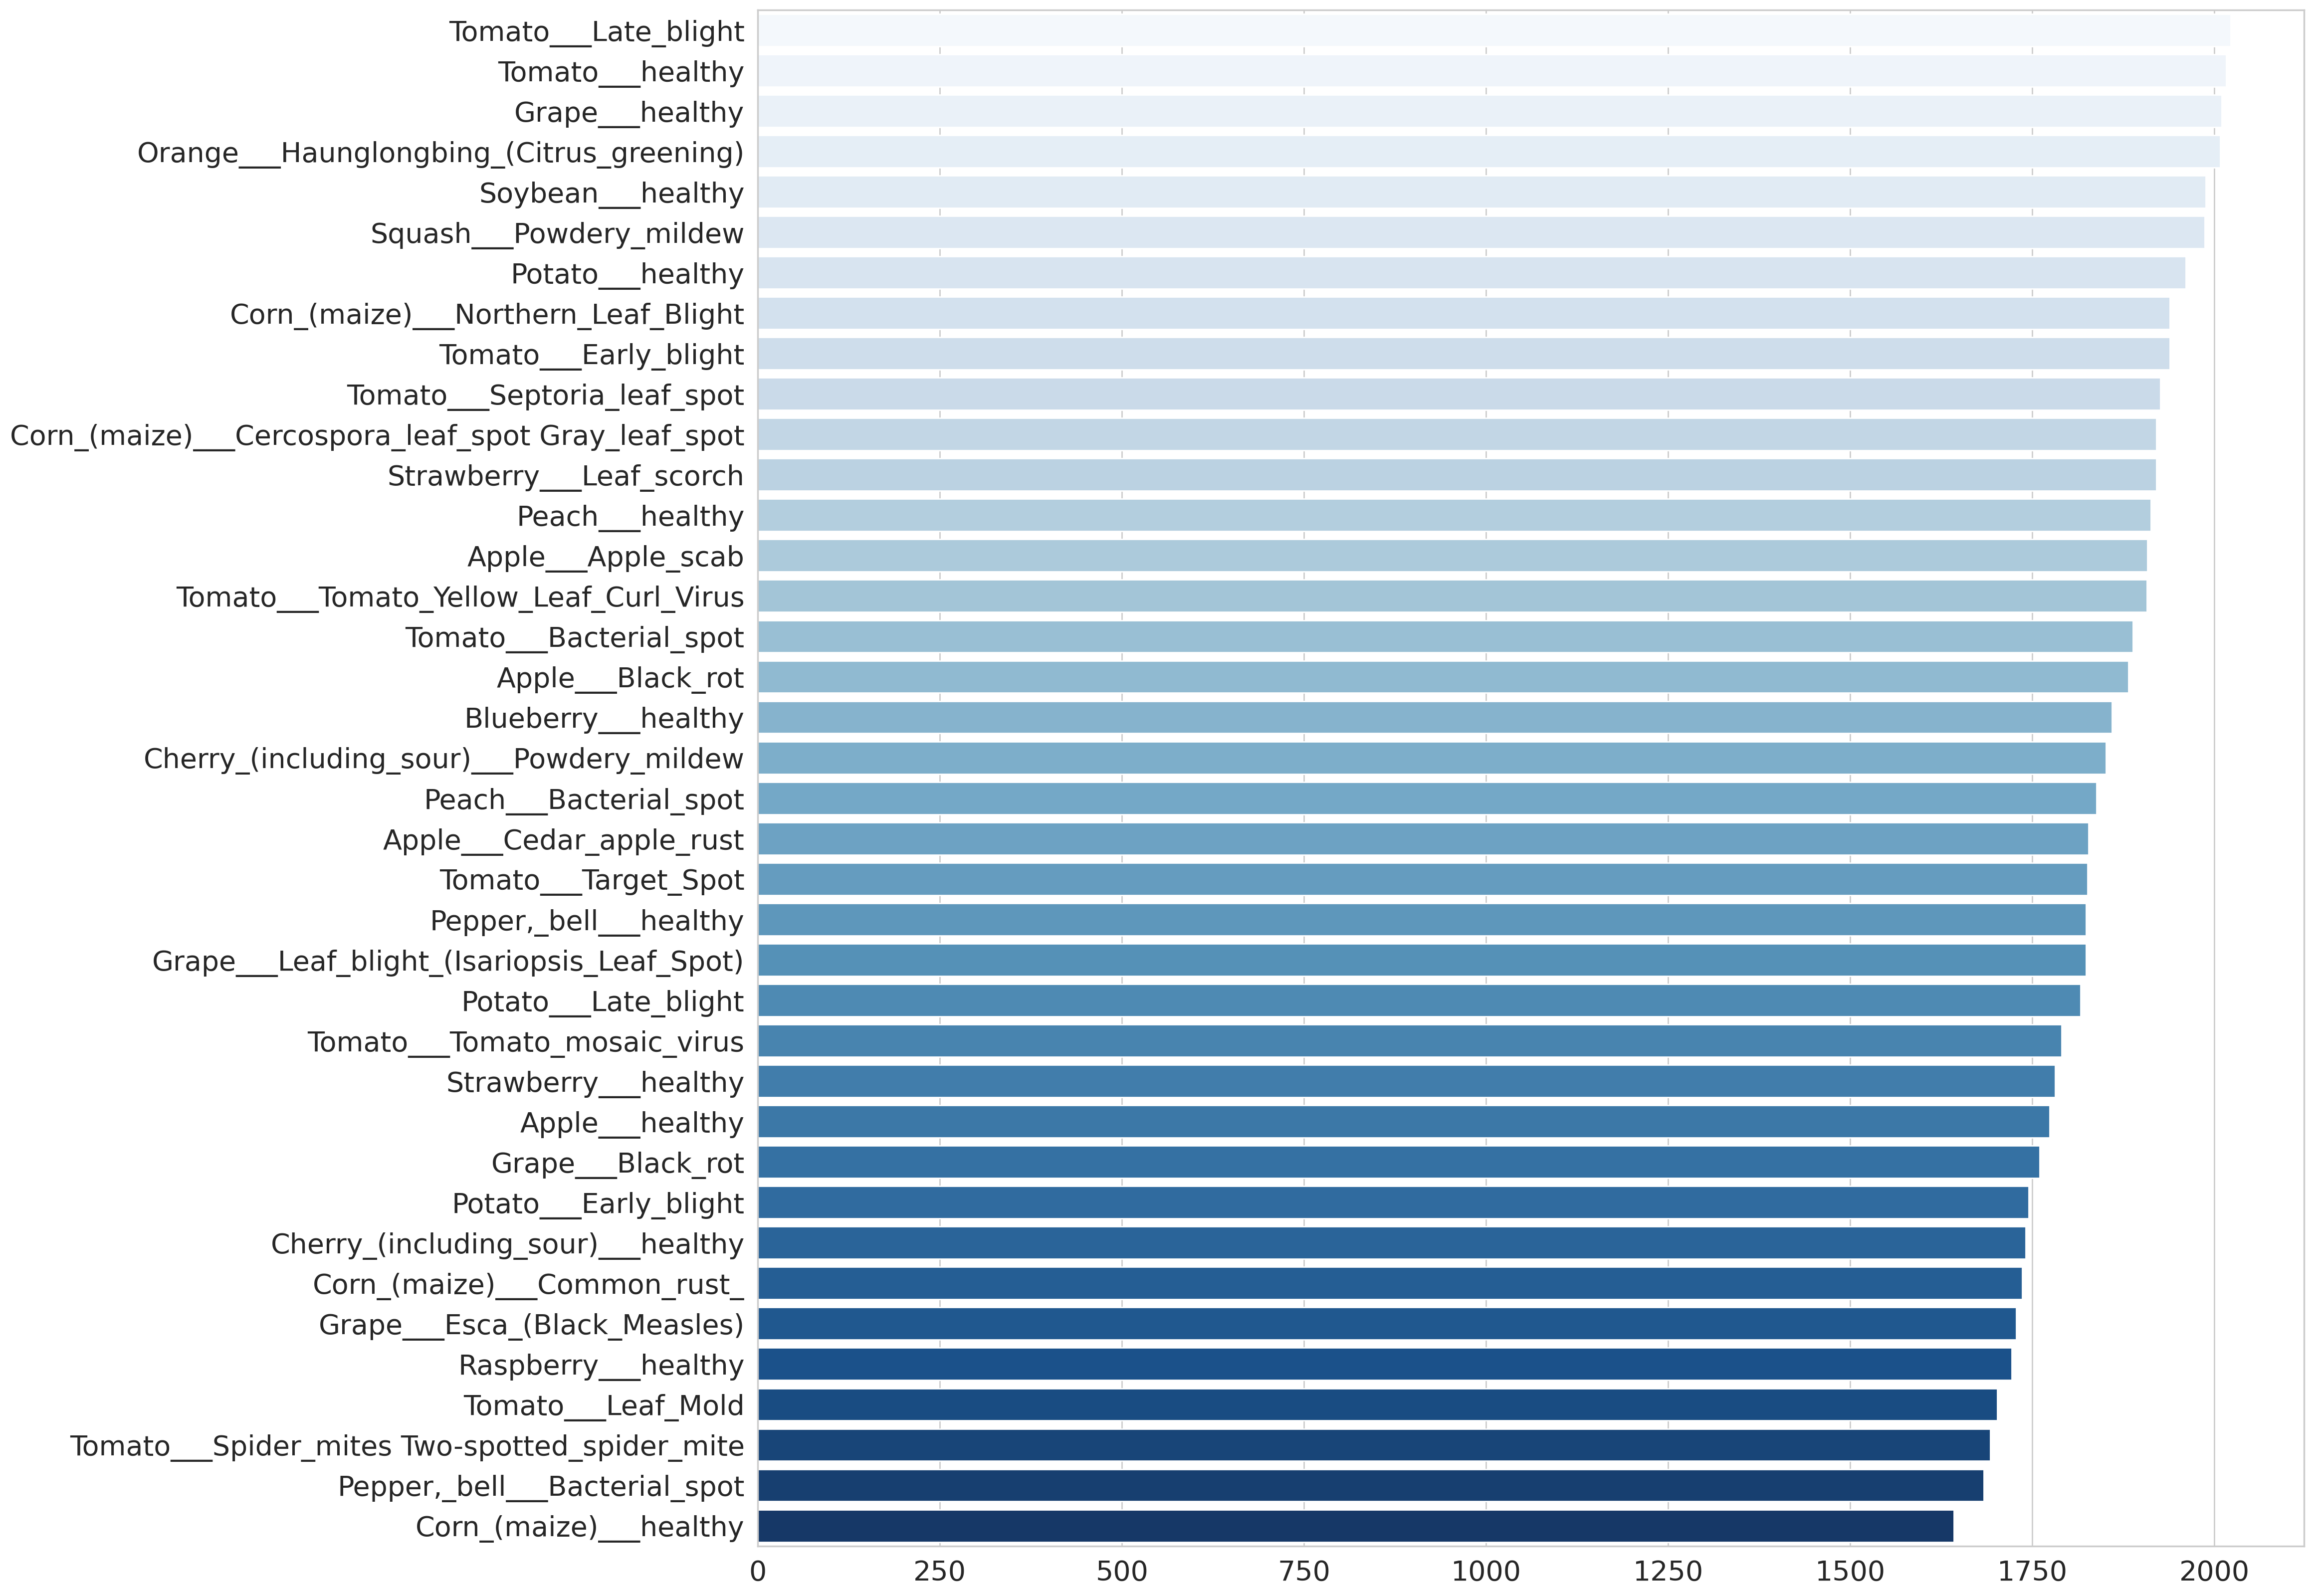

In [5]:
plant_names = []
Len = []
for i in Diseases_Classes:
    plant_names.append(i)
    imgs_path = os.listdir(train_path + "/" + i)
    Len.append(len(imgs_path))

Len.sort(reverse=True)

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,20),dpi=200)
ax = sns.barplot(x= Len, y= plant_names, palette="Blues")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [6]:
train = ImageFolder(train_path, transform = transforms.ToTensor() )
valid = ImageFolder(valid_path, transform = transforms.ToTensor() )

In [7]:
train

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: ToTensor()

In [8]:
train[100]

(tensor([[[0.0118, 0.0627, 0.0627,  ..., 0.4510, 0.4392, 0.4706],
          [0.0078, 0.0588, 0.0588,  ..., 0.4510, 0.4471, 0.4627],
          [0.0039, 0.0549, 0.0549,  ..., 0.4510, 0.4549, 0.4549],
          ...,
          [0.0000, 0.8745, 0.8510,  ..., 0.4588, 0.4196, 0.4471],
          [0.0000, 0.8784, 0.8549,  ..., 0.4863, 0.4431, 0.4353],
          [0.0039, 0.8784, 0.8471,  ..., 0.5098, 0.4980, 0.4588]],
 
         [[0.0039, 0.0549, 0.0549,  ..., 0.4275, 0.4157, 0.4471],
          [0.0000, 0.0510, 0.0510,  ..., 0.4275, 0.4235, 0.4392],
          [0.0000, 0.0471, 0.0471,  ..., 0.4275, 0.4314, 0.4314],
          ...,
          [0.0000, 0.8784, 0.8510,  ..., 0.4431, 0.4039, 0.4314],
          [0.0039, 0.8824, 0.8549,  ..., 0.4706, 0.4275, 0.4196],
          [0.0078, 0.8824, 0.8471,  ..., 0.4941, 0.4824, 0.4431]],
 
         [[0.0157, 0.0667, 0.0745,  ..., 0.5765, 0.5647, 0.5961],
          [0.0118, 0.0627, 0.0706,  ..., 0.5765, 0.5725, 0.5882],
          [0.0078, 0.0588, 0.0667,  ...,

NameError: name 'train' is not defined

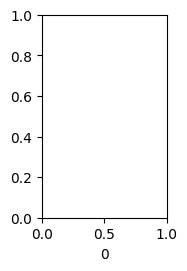

In [6]:
# Define a function to display an image with its label
def show_image(image, label):
    # Print the label of the image using the class names from the training set
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    
    # Rearrange the image tensor's dimensions from (C, H, W) to (H, W, C) so it can be displayed
    plt.imshow(image.permute(1, 2, 0))

# List of specific image indices to be displayed
image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]

chs = 0  # Counter to keep track of the subplot position
for img in image_list:
    chs += 1  # Increment the counter for each image

    # Create a subplot grid with 2 rows and 4 columns, placing images accordingly
    plt.subplot(2, 4, chs)
    
    # Setting layout adjustments for better display of images
    plt.tight_layout()
    
    # Display the image index as the x-axis label
    plt.xlabel(img, fontsize=10)
    
    # Display the label of the image as the title
    plt.title(train[img][1])
    
    # Call the show_image function to display the image and label
    show_image(*train[img])


In [10]:
# DataLoader for the training dataset
train_dataloader = DataLoader(
    train,            # The dataset for training (assumed to be defined earlier)
    batch_size=32,    # Number of samples per batch (32 samples will be processed together)
    shuffle=True,     # Shuffle the data at each epoch, which is important for training
    num_workers=2,    # Number of subprocesses used to load data (2 worker threads to load data in parallel)
    pin_memory=True   # If True, the data loader will copy tensors into CUDA pinned memory (faster transfers to GPU)
)

# DataLoader for the validation dataset
valid_dataloader = DataLoader(
    valid,            # The dataset for validation (assumed to be defined earlier)
    batch_size=32,    # Number of samples per batch (same size as TrainLoader for consistency)
    shuffle=True,     # Shuffle validation data; optional, but can ensure variety if the validation set is large
    num_workers=2,    # Use 2 worker threads to load data in parallel
    pin_memory=True   # Useful for GPU-based training; helps faster data transfer from host memory to GPU memory
)


## **1. Choosing the Device (get_default_device)**
## This function determines whether a GPU is available and returns the appropriate device (GPU or CPU).

In [11]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")


## **2. Moving Data to the Device (to_device)**
## This function moves a tensor (or a list of tensors) to the chosen device (CPU or GPU).

In [12]:
# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

## **3. Automatically Moving Batches to the Device (DeviceDataLoader)**
## This class wraps a DataLoader and moves batches of data to the chosen device automatically.

In [13]:
# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)


In [14]:
device = get_default_device()
device

device(type='cuda')

In [15]:
# Wrap the training DataLoader with DeviceDataLoader to automatically move batches to the specified device (GPU or CPU)
train_dataloader = DeviceDataLoader(train_dataloader, device)

# Wrap the validation DataLoader with DeviceDataLoader to automatically move batches to the specified device (GPU or CPU)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)


In [7]:
# Function to calculate the accuracy of the model predictions
def accuracy(outputs, labels):
    """
    Computes the accuracy of model predictions.
    
    Parameters:
    - outputs (torch.Tensor): The raw output logits from the model (not probabilities).
    - labels (torch.Tensor): The ground truth labels.

    Returns:
    - torch.Tensor: A tensor containing the accuracy as a float value.
    """
    # Get the predicted class by taking the index with the highest value (logit) along dimension 1
    _, preds = torch.max(outputs, dim=1)
    
    # Calculate the number of correct predictions and compute accuracy
    correct = torch.sum(preds == labels).item()
    accuracy = correct / len(labels)
    
    # Return the accuracy as a tensor
    return torch.tensor(accuracy)


In [8]:
# Base class for Image Classification models
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        """
        Defines the training step for a single batch.
        
        Parameters:
        - batch (tuple): A tuple containing the input images and corresponding labels.
        
        Returns:
        - loss (torch.Tensor): The computed cross-entropy loss for the batch.
        """
        images, labels = batch  # Unpack the batch
        out = self(images)  # Generate predictions by passing images through the model
        loss = F.cross_entropy(out, labels)  # Calculate cross-entropy loss
        return loss

    def validation_step(self, batch):
        """
        Defines the validation step for a single batch.
        
        Parameters:
        - batch (tuple): A tuple containing the input images and corresponding labels.
        
        Returns:
        - dict: A dictionary containing the validation loss and accuracy for the batch.
        """
        images, labels = batch  # Unpack the batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate cross-entropy loss
        acc = accuracy(out, labels)  # Calculate accuracy using the accuracy function
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        """
        Computes the average loss and accuracy over an entire validation epoch.
        
        Parameters:
        - outputs (list): A list of dictionaries containing 'val_loss' and 'val_acc' for each batch.
        
        Returns:
        - dict: A dictionary containing the average validation loss and accuracy for the epoch.
        """
        batch_losses = [x['val_loss'] for x in outputs]  # Extract loss from each batch
        epoch_loss = torch.stack(batch_losses).mean()  # Compute average loss over all batches
        batch_accs = [x['val_acc'] for x in outputs]  # Extract accuracy from each batch
        epoch_acc = torch.stack(batch_accs).mean()  # Compute average accuracy over all batches
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        """
        Prints the results at the end of each epoch.
        
        Parameters:
        - epoch (int): The current epoch number.
        - result (dict): A dictionary containing the results for the epoch (losses and accuracy).
        """
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [9]:
# Function to create a convolutional block with optional pooling
def ConvBlock(in_channels, out_channels, pool=False):
    """
    Creates a convolutional block consisting of a Conv2D layer, Batch Normalization, 
    and ReLU activation, with an optional MaxPooling layer.
    
    Parameters:
    - in_channels (int): Number of input channels.
    - out_channels (int): Number of output channels after the convolution.
    - pool (bool): If True, adds a MaxPooling layer after the convolutional layer.

    Returns:
    - nn.Sequential: A sequential container of the layers forming the convolutional block.
    """
    # Define the core layers: Convolution -> Batch Normalization -> ReLU Activation
    layers = [
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),  # 3x3 Convolution with padding
        nn.BatchNorm2d(out_channels),  # Batch Normalization to stabilize learning
        nn.ReLU(inplace=True)  # ReLU Activation (in-place for memory efficiency)
    ]
    
    # Add MaxPooling layer if pooling is enabled
    if pool:
        layers.append(nn.MaxPool2d(4))  # 4x4 Max Pooling to reduce spatial dimensions

    # Return the sequential block of layers
    return nn.Sequential(*layers)


# **Model Structure**

#### The **in_channels** parameter refers to the number of input channels for the convolutional layer in a Convolutional Neural Network (CNN) block like RGB Images havee 3 channels.

In [10]:
# Custom ResNet-like CNN architecture for image classification
class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        """
        Initializes the CNN model with convolutional blocks and residual connections.
        
        Parameters:
        - in_channels (int): Number of input channels (e.g., 3 for RGB images).
        - num_diseases (int): Number of output classes for classification.
        """
        super().__init__()
        
        # Initial convolutional layers
        self.conv1 = ConvBlock(in_channels, 64)  # First convolution block
        self.conv2 = ConvBlock(64, 128, pool=True)  # Second convolution block with pooling
        
        # First residual block (two convolutional layers)
        self.res1 = nn.Sequential(
            ConvBlock(128, 128),
            ConvBlock(128, 128)
        )
        
        # Additional convolutional layers
        self.conv3 = ConvBlock(128, 256, pool=True)  # Third convolution block with pooling
        self.conv4 = ConvBlock(256, 512, pool=True)  # Fourth convolution block with pooling
        
        # Additional residual block (two convolutional layers)
        self.res2 = nn.Sequential(
            ConvBlock(512, 512),
            ConvBlock(512, 512)
        )
        
        # Classifier block: Pooling, Flatten, and Linear layer for classification
        self.classifier = nn.Sequential(
            nn.MaxPool2d(4),  # Max pooling to reduce feature map size
            nn.Flatten(),     # Flatten the feature map for the linear layer
            nn.Linear(512, num_diseases)  # Fully connected layer for classification
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.
        
        Parameters:
        - x (torch.Tensor): Input tensor (batch of images).
        
        Returns:
        - torch.Tensor: Output tensor (predictions for each class).
        """
        # Pass input through initial convolutional layers
        out = self.conv1(x)
        out = self.conv2(out)
        
        # Apply first residual block and add the input for skip connection
        out = self.res1(out) + out
        
        # Pass through additional convolutional layers
        out = self.conv3(out)
        out = self.conv4(out)
        
        # Apply second residual block and add the input for skip connection
        out = self.res2(out) + out
        
        # Pass through the classifier block to get final output
        out = self.classifier(out)
        return out



### **Why are we use numbers in layers like (16, 32, 64, 128, 256, 512)** ? 

### Because of **Compatibility** with Hardware:

#### While you can use numbers like 25 or 89, it's often more efficient to use numbers that are powers of 2 (such as 32, 64, 128, etc.). This is because most hardware (like GPUs) is optimized for power-of-2 (2^n) memory usage and operations, making the training process faster and more memory-efficient.

In [20]:
# Initialize the model with input channels and number of output classes
model = to_device(CNN_NeuralNet(3, len(train.classes)), device) 

# Display the model architecture
model


CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [21]:
# Evaluates the performance of the model on the validation dataset.
#  Parameters:
#       model (nn.Module): The model to be evaluated.
#        val_loader (DataLoader): DataLoader instance for the validation dataset.

#    Returns:
#       dict: Contains validation loss and accuracy for the entire validation set.


# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


In [22]:
## Function to retrieve the learning rate from a PyTorch optimizer.
## This function assumes that the optimizer has parameter groups and
## that each group contains a learning rate (`'lr'`) key.

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


In [23]:
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                 grad_clip=None, opt_func=torch.optim.SGD):
    """
    Trains the model using the One Cycle Learning Rate policy.
    
    Parameters:
    - epochs (int): Number of epochs to train the model.
    - max_lr (float): Maximum learning rate for the One Cycle policy.
    - model (nn.Module): The neural network model to train.
    - train_loader (DataLoader): DataLoader for the training set.
    - val_loader (DataLoader): DataLoader for the validation set.
    - weight_decay (float): Weight decay (L2 regularization) factor.
    - grad_clip (float or None): Maximum gradient norm for gradient clipping.
    - opt_func (Optimizer): Optimization function (default is SGD).

    Returns:
    - history (list): A list of results for each epoch (losses, accuracies, learning rates).
    """
    torch.cuda.empty_cache()  # Clear GPU cache to free up memory
    history = []  # To store training results of each epoch
    
    # Initialize optimizer with weight decay (L2 regularization)
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    # Scheduler for One Cycle Learning Rate policy
    sched = torch.optim.lr_scheduler.OneCycleLR(
        optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader)
    )        
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        train_losses = []  # To track losses for the current epoch
        lrs = []  # To track learning rates for each batch
        for batch in train_loader:
            # Training step
            loss = model.training_step(batch)  # Compute loss
            train_losses.append(loss)  # Collect the loss for analysis
            loss.backward()  # Compute gradients        
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            optimizer.step()  # Update model parameters
            optimizer.zero_grad()  # Reset gradients to zero for the next batch            
            lrs.append(get_lr(optimizer))
            sched.step()  # Update learning rate based on the One Cycle policy    
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()  # Average training loss
        result['lrs'] = lrs  # Learning rates used during the epoch
        model.epoch_end(epoch, result)  # Display epoch results
        history.append(result)  # Store results
    return history  # Return the history of training

In [24]:
%%time
history = [evaluate(model, valid_dataloader)]
history

CPU times: user 37.6 s, sys: 3.75 s, total: 41.4 s
Wall time: 47.2 s


[{'val_loss': 3.6382739543914795, 'val_acc': 0.03244318068027496}]

In [25]:
num_epochs = 5                # Number of training epochs
learning_rate = 0.01          # Learning rate for the optimizer
grad_clip = 0.15              # Maximum gradient norm for gradient clipping
weight_decay = 1e-4           # Weight decay (L2 regularization) factor
optimizer_function = torch.optim.Adam  # Optimization function

In [ ]:
%%time  
history += fit_OneCycle(
    num_epochs,                 # Number of training epochs
    learning_rate,              # Maximum learning rate for the One Cycle policy
    model,                      # Neural network model to train
    train_dataloader,           # DataLoader for the training set
    valid_dataloader,           # DataLoader for the validation set
    grad_clip=grad_clip,        # Gradient clipping threshold
    weight_decay=weight_decay,  # Weight decay for regularization
    opt_func=optimizer_function # Optimization function (Adam)
)

In [ ]:
val_acc = []
val_loss = []
train_loss = []

for i in history:
    val_acc.append(i['val_acc'])
    val_loss.append(i['val_loss'])
    train_loss.append(i.get('train_loss'))

In [ ]:
import plotly.graph_objects as go
epoch_count = list(range(1, 7))
train_trace = go.Scatter(
    x=epoch_count,
    y=train_loss,
    mode='lines+markers',
    name='Training Loss',
    line=dict(color='orangered', dash='dash'),
    marker=dict(symbol='circle', size=8)
)

val_trace = go.Scatter(
    x=epoch_count,
    y=val_loss,
    mode='lines+markers',
    name='Validation Loss',
    line=dict(color='green', dash='dash'),
    marker=dict(symbol='circle', size=8)
)

fig = go.Figure(data=[train_trace, val_trace])
fig.update_layout(
    title='Training and Validation Loss Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    legend_title='Loss Type',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)
fig.show()

In [ ]:
test = ImageFolder(test_path, transform=transforms.ToTensor())
test_images = sorted(os.listdir(test_path + '/test'))
print(test_images)
print(len(test_images))

In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [ ]:
# predicting first image
img, label = test[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[1], ', Predicted:', predict_image(img, model))

In [ ]:
# predicting second image
img, label = test[20]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[26], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model, "DetectingPlantDiseases.pth")

In [ ]:
!pip install kaggle -- quiet

In [ ]:
import os
import json
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open('/workspaces/project/kaggle.json', 'w') as f:
    json.dump(api_credentials, f)

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [ ]:
!unzip new-plant-diseases-dataset.zip